<font style="font-size:28px;" align="left"><b>Kvantumállapot-tomográfia egy kvantumbiten  </b></font>
<br>

Ebben a projektben a kvantumállapot-tomográfiával ismerkedünk meg.

Képzeljetek el egy érmét, amiről feldobások segítségével szeretnénk eldönteni, hogy cinkelt, vagy szabályos. Ha sokszor feldobjuk az érmét, és feljegyezzük az dobások erdményét, akkor tudunk egy becslést adni arra, hogy ez az érme mekkora valószínűséggel ad fejet és mekkora valószínűséggel ad írást.

Ehhez hasonlóan, most egy kvantumbit ismeretlen állapotát szeretnénk meghatározni mérések segítségével.

Ehhez szükségünk lesz az "unknown_qubit" python osztályra. Mielőtt rátérnénk a feladatra, futtassátok le az alábbi cellát:

In [14]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
class unknown_qubit:   
    def __init__(self):
        self.__theta = randrange(18000)/18000*pi        
        self.__available_qubits = 1000
        self.__active_qubits = 0
        print(self.__available_qubits,"db másolatot létrehoztunk az ismeretlen kvantumbitről")
    
    def get_qubits(self,number_of_qubits=None):
        if number_of_qubits is None or isinstance(number_of_qubits,int) is False or number_of_qubits < 1:
            print()
            print("ERROR: a 'get_qubits' metódus pozitív egész számot kér be, pl. get_qubits(100)")
        elif number_of_qubits <= self.__available_qubits:
            self.__qc = QuantumCircuit(1,1)
            self.__qc.ry(2 * self.__theta,0)
            self.__active_qubits = number_of_qubits
            self.__available_qubits = self.__available_qubits - self.__active_qubits
            print()
            print(number_of_qubits,"aktív kvantumbit értéke (cos(theta),sin(theta))-ra lett állítva")
            self.available_qubits()
        else:
            print()
            print("WARNING:",number_of_qubits,"több, mint a rendelkezésre álló kvantumbitek száma")
            self.available_qubits()
            
    def measure_qubits(self):    
        if self.__active_qubits > 0:            
            self.__qc.measure(0,0)
            job = execute(self.__qc,Aer.get_backend('qasm_simulator'),shots=self.__active_qubits)
            counts = job.result().get_counts(self.__qc)
            print()
            print("a",self.__active_qubits,"kvantumbitet megmértük")
            print("mérési eredmények = ",counts)
            self.__active_qubits = 0
            return counts
        else:
            print()
            print("WARNING: jelenleg nincs aktív qubit -- futassa a 'get_qubits()' metódust")
            self.available_qubits()
            
    def rotate_qubits(self,angle=None):
        if angle is None or (isinstance(angle,float) is False and isinstance(angle,int) is False):
            print()
            print("ERROR: a 'rotate_qubits' metódus paramétere egy valós szám, a radiánban mért szög, pl. rotate_qubits(1.2121)")
        elif self.__active_qubits > 0:
            self.__qc.ry(2 * angle,0)
            print()
            print("az aktív kvantumbiteket elforgattuk",angle,"radiánnal")
        else:
            print()
            print("WARNING: jelenleg nincs aktív qubit -- futassa a 'get_qubits()' metódust")
            self.available_qubits()    
    
    def compare_my_guess(self,my_angle):
        if my_angle is None or (isinstance(my_angle,float) is False and isinstance(my_angle,int) is False):
            print("ERROR: a 'compare_my_guess' metódus paramétere egy valós szám, a radiánban mért szög, pl. compare_my_guess(1.2121)")
        else:
            self.__available_qubits = 0
            diff = abs(my_angle-self.__theta)
            print()
            print(self.__theta/pi*180,"fok az eredeti szög",)
            print(my_angle/pi*180,"fok a becslés")
            print("a különbéség az eredeti szög és a becslés között",diff/pi*180,"fok")
            print("--> az elérhető kvantumbitek száma nulla, nem tudsz kísérletet végezni")

    def available_qubits(self):
        print("--> a fennmaradt kvantumbitek száma ",self.__available_qubits)              

Segítség az __unknown_qubit__ osztály használatához:
    
    available_qubit = 1000 -> 1000 "másolatot" készítünk a kvantumbitünkről
    get_qubits(number_of_qubits) -> ebből valahányat ki tudunk választani egy adott méréshez
    measure_qubits() -> megméri a kvantumbiteket és kiadja az eredményt
                     -> mérés után a kvantumbitek eltűnnek
    rotate_qubits(angle) -> elforgatja a kvantumbiteket a kívánt szöggel (radiánban kell megadni!)
    compare_my_guess(my_angle) -> a (radiánban) beírt szöget összehasonlítja a ténylegessel (eredetivel)

<h3> Feladat </h3>

Tegyük fel, hogy van 1000 db kvantumbitünk, és mindegyik ugyanabban az ismeretlen $\ket{\psi}$ állapotban van, amit meg szeretnénk határozni. Ezekkel fogunk kísérletezni.

A szóban forgó kvantumállapotot véletlenszerűen sorsoljuk ki az "unknown_qubit" függvény segítségével úgy, hogy az egységkör első, vagy második negyedébe essen. Becsüljük meg az állapothoz tartozó $ \theta \in [0,\pi[ $ szöget mérések segítségével!

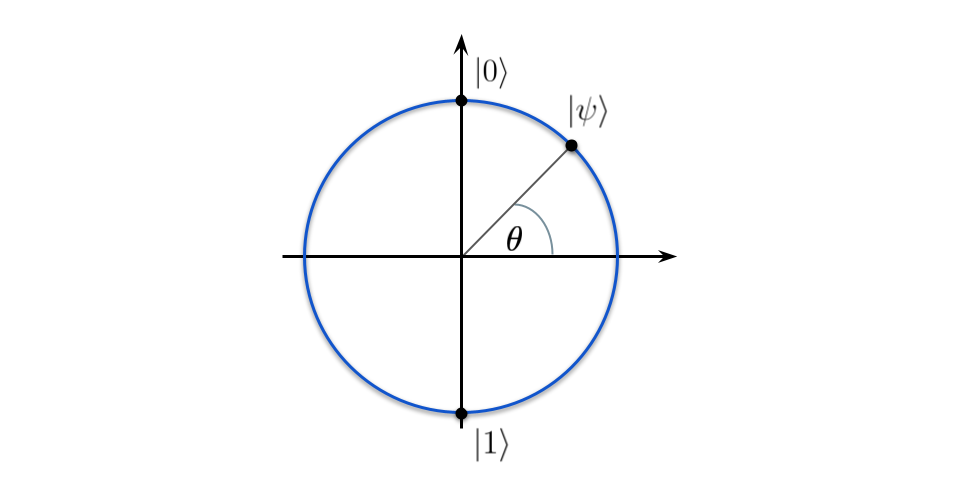

_Vigyázat! A $ \theta_1 = \pi / 3 $ és $ \theta_2 = 2 \pi / 3 $ szögekhez tartozó kvantumállapotok ugyanazokat a mérési eredményeket adják, de ezeket is szeretnénk megkülönböztetni valahogyan!_

In [3]:
from math import pi, cos, sin, acos, asin

# a theta szöget véletlenszerűen kisorsoljuk és utána nem változtatjuk
my_experiment = unknown_qubit() 

#
# Megoldás helye
#



Az elkészült megoldást legalább 10-szer teszteljétek!

In [4]:
for i in range(10):
    my_experiment = unknown_qubit()
    
    #
    # Megoldás helye
    #

<h3> Szorgalmi feladat </h3>

Ha a $ \theta$ szöget a $[0,2\pi[$ intervallumból választjuk, akkor meg tudjuk-e határozni, hogy melyik negyedben van a kvantumbit állapota? 
Van-e megfigyelhető különbség $\ket{\psi}$ és -$\ket{\psi}$ között?